# <span style="color:blue;">OpenPIV-Python-CPU Stitching Tutorial</span>

Please use the following link to run this notebook from Google Colab:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ali-sh-96/openpiv-python-cpu/blob/main/openpiv_cpu/tutorials/openpiv_python_cpu_stitching_tutorial.ipynb)

## <span style="color:blue;">Introduction</span>

This tutorial demonstrates how to stitch two frames of the same height to use as an input for `piv_cpu` function in OpenPIV-Python-CPU. To this end, a pair of calibration images for a NACA 0025 airfoil (acquired in the Turbulence Research Lab, University of Toronto) is used. The images are 2048 by 2560 pixels squared and approximately 10.0 MB in size. The resulting stitched calibration frame is presented as an image. The obtained stitching parameters may be used to merge and save the PIV images for each camera.

## <span style="color:blue;">Dependencies</span>

The `openpiv-python-cpu` package only installs the packages strictly needed for PIV analysis, which typically includes only `pyfftw`, as `numpy`, `scipy`, and `numba` are already preinstalled in most Python distributions. The choice of other libraries, such as those needed to load or save images, is left to the users. In this tutorial, OpenCV-Python is used to load images. The `imwrite` function of the same package may be used to save the images if needed.

In [1]:
#@title Import the needed libraries
#@markdown Run this block to import the dependencies.
import pkg_resources
import os
from glob import glob
import cv2
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#@title Install `openpiv-python-cpu`
#@markdown Run this block to install `openpiv-python-cpu`.
!pip install git+https://github.com/ali-sh-96/openpiv-python-cpu
from openpiv_cpu.cpu_preprocess import stitch_cpu

# Get the path to the installed package.
openpiv_path = pkg_resources.resource_filename('openpiv_cpu', '')
tutorial_path = os.path.join(openpiv_path, 'tutorials/')

  Cloning https://github.com/ali-sh-96/openpiv-python-cpu to /tmp/pip-req-build-5i4n3915
  Running command git clone --filter=blob:none --quiet https://github.com/ali-sh-96/openpiv-python-cpu /tmp/pip-req-build-5i4n3915
  Resolved https://github.com/ali-sh-96/openpiv-python-cpu to commit 24fcd1e4094c5be803d2fd601d8f78a841241e4d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 3.4 MB/s eta 0:00:00
  Created wheel for OpenPIV-Python-CPU: filename=OpenPIV_Python_CPU-1.1.0-py3-none-any.whl size=62379492 sha256=c8c9764c7a2b07859dd7962b7364563a36ab0cfe0def8b32a195035be14b5e3c
  Stored in directory: /tmp/pip-ephem-wheel-cache-8ml8o4ju/wheels/6f/31/b7/db282a2e2db8f3ce11a5831a18d2ae8a26b43fadcd7ba7f225
Successfully built OpenPIV-Python-CPU


## <span style="color:blue;">Calibration</span>

To initiate the stitching process all images, the initial step involves extracting two stitching parameters from the calibration image. The first parameter `overlap` may be obtained directly from the calibration images, as shown below. The second parameter is the vertical shift of the right frame `y_offset`. Once a proper value of `overlap` is set, `y_offset` may be adjusted to obtain the best stitched image.

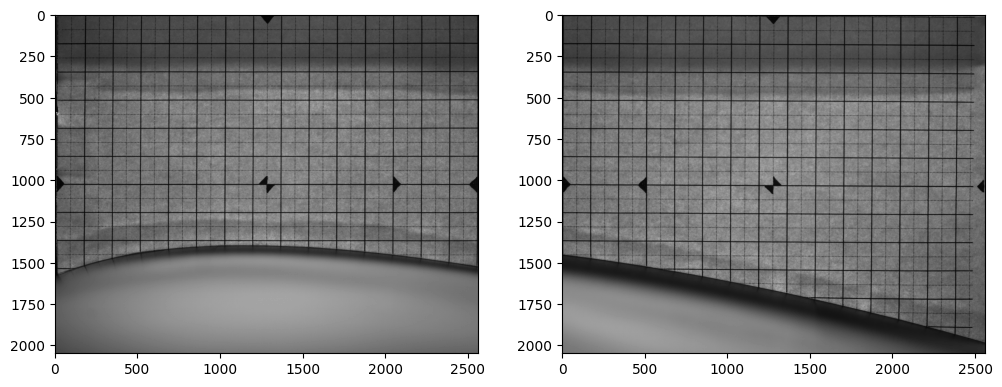

In [3]:
#@title Load the calibration images
# Load the images.
test_dir = tutorial_path + "test3/"
frame_a = cv2.imread(test_dir + "Cam1.tif", cv2.IMREAD_ANYDEPTH)
frame_b = cv2.imread(test_dir + "Cam2.tif", cv2.IMREAD_ANYDEPTH)

fig, axs = plt.subplots(1, 2, figsize=(12,10))
axs[0].imshow(frame_a, cmap=plt.cm.gray)
axs[1].imshow(frame_b, cmap=plt.cm.gray)

# Modify tick labels and ticks.
tick_step = 250
ht, wd = frame_a.shape
for ax in axs:
    ax.set_xticks(range(0, wd, 2 * tick_step))
    ax.set_yticks(range(0, ht, tick_step))

plt.show()

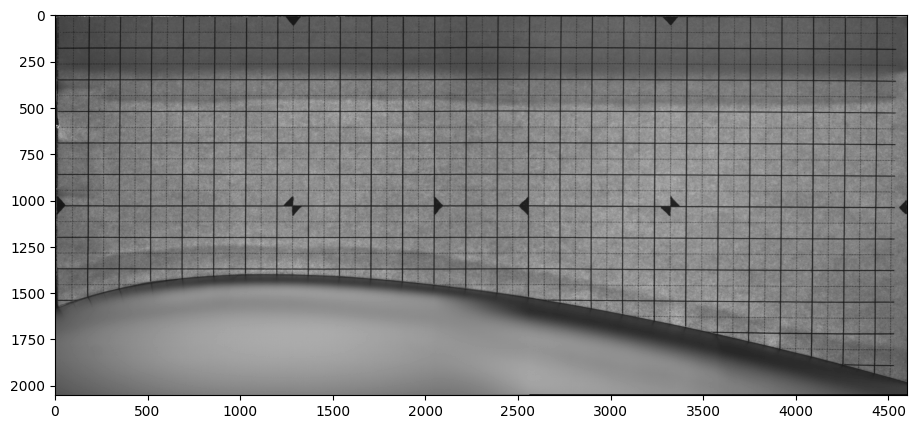

In [4]:
#@title Initialize the stitching process
#@markdown Width of the overlapping region in x-direction.
overlap = 517 #@param {type:"raw"}
#@markdown Shift the second frame y-direction.
y_offset = 4 #@param {type:"raw"}

# Initialize the process.
frame_a_shape = frame_a.shape
frame_b_shape = frame_b.shape
stitch = stitch_cpu(frame_a_shape, frame_b_shape,
                    overlap=overlap,
                    y_offset=y_offset,
                    dtype_u="uint16")

frame = stitch(frame_a, frame_b)
ht, wd = frame.shape
fig, ax = plt.subplots(figsize=(11, 11))
ax.imshow(frame, cmap='gray')

# Modify tick labels and ticks.
tick_step = 250
plt.xticks(range(0, wd, 2 * tick_step))
plt.yticks(range(0, ht, tick_step))
plt.show()